In [4]:

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX


In [5]:
df = pd.read_csv("../data/processed/cleaned_data.csv")
df.head()


,year,month,country,region,avg_temp_c,precipitation_mm,air_quality_index,uv_index,malaria_cases,dengue_cases,population_density,healthcare_budget,season
0,2000,1,Palestinian Territory,Central,28.132468,152.083870,110.487231,12.000000,53,145,113,1068,Winter
1,2000,2,Palestinian Territory,Central,30.886500,119.591418,83.467928,12.000000,132,48,113,1068,Winter
2,2000,3,Palestinian Territory,Central,31.366433,95.876124,93.095292,12.000000,34,80,113,1068,Summer
3,2000,4,Palestinian Territory,Central,28.481870,175.315731,105.530192,9.395894,23,133,113,1068,Summer
4,2000,5,Palestinian Territory,Central,26.890370,191.445990,60.205979,9.935726,39,74,113,1068,Summer


In [6]:
df["date"] = pd.to_datetime(
    df["year"].astype(str) + "-" + df["month"].astype(str) + "-01"
)


In [7]:
ts = df.groupby("date")["malaria_cases"].mean()
ts.head()


date
2000-01-01    79.650000
2000-02-01    78.141667
2000-03-01    86.750000
2000-04-01    75.208333
2000-05-01    73.483333
Name: malaria_cases, dtype: float64

In [8]:
ts = ts.asfreq("MS")  # Monthly start frequency


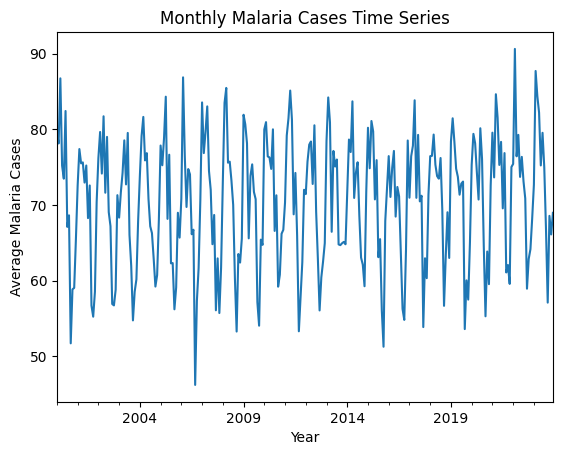

In [9]:
plt.figure()
ts.plot()
plt.title("Monthly Malaria Cases Time Series")
plt.xlabel("Year")
plt.ylabel("Average Malaria Cases")
plt.savefig("../visuals/time_series_overview.png", bbox_inches="tight")
plt.show()


In [10]:
model = SARIMAX(
    ts,
    order=(1, 1, 1),          # Trend
    seasonal_order=(1, 1, 1, 12)  # Seasonality (12 months)
)

results = model.fit()


In [11]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                      malaria_cases   No. Observations:                  288
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -792.084
Date:                            Thu, 15 Jan 2026   AIC                           1594.168
Time:                                    23:27:16   BIC                           1612.251
Sample:                                01-01-2000   HQIC                          1601.425
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0634      0.069     -0.924      0.355      -0.198       0.071
ma.L1         -0.9730      0.026    -37.526      0.000      -1.024      -0.922
ar.S.L12      -0.0137      0.075     -0.182      0.856      -0.162       0.134
ma.S.L12      -0.9996     11.331     -0.088      0.930     -23.208      21.209
sigma2        15.8587    179.331      0.088      0.930    -335.624     367.341
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.76   Prob(JB):                         0.85
Heteroskedasticity (H):               0.92   Skew:                            -0.08
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()


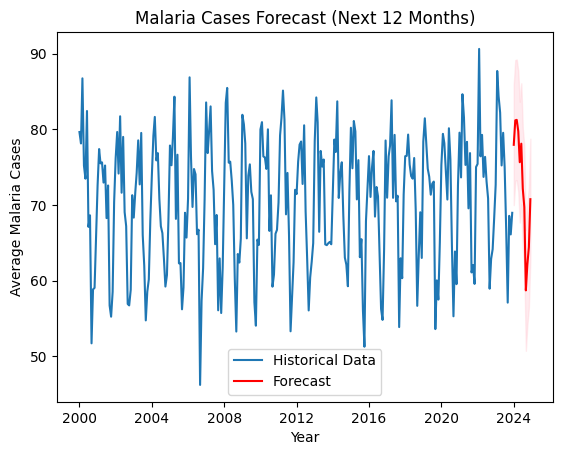

In [13]:
plt.figure()

plt.plot(ts, label="Historical Data")
plt.plot(forecast_mean, label="Forecast", color="red")

plt.fill_between(
    confidence_intervals.index,
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color="pink",
    alpha=0.3
)

plt.title("Malaria Cases Forecast (Next 12 Months)")
plt.xlabel("Year")
plt.ylabel("Average Malaria Cases")
plt.legend()

plt.savefig("../visuals/malaria_forecast.png", bbox_inches="tight")
plt.show()
